In [194]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
from matplotlib import pyplot as plt
from Config import local_path
os.environ["PATH"] += os.pathsep + local_path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz 
import scipy

%matplotlib inline


In [195]:
def vars_to_themes(vars_list, themes_set, grp_data):
    temp = []
    themes = {}
    for x in themes_set:
        temp = [y for y in grp_data.get_group(x).Var_Name.values]
        themes.setdefault(x, temp[:])
    return themes

def font_color(val):
    color = 'white' if (val > 0.1) else 'black'
    return 'color: %s' % color

In [196]:
file_name = 'Cleaned_Data.csv'
file_path = 'C:/Users/vasqu/Project_One_Bootcamp/Resources/'
input_file = os.path.join(file_path, file_name)
solar_df = pd.read_csv(input_file, index_col=False, encoding='ANSI', delimiter=',' )
solar_df

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0,0,0.000000,27145011200,70352.78987,Stearns County,569,1690,13,...,39,11,13,34,0,0,25,12,0,9.46
1,2,3,3,64.505776,27145011302,71496.88658,Stearns County,854,1459,31,...,39,11,13,34,0,0,25,12,0,9.46
2,3,0,0,0.000000,27145011304,86840.15275,Stearns County,640,1116,68,...,39,11,13,34,0,0,25,12,0,9.46
3,4,5,5,164.583303,27145011400,89135.31560,Stearns County,654,1314,15,...,39,11,13,34,0,0,25,12,0,9.46
4,5,0,0,0.000000,27145011500,62225.90361,Stearns County,522,1395,24,...,39,11,13,34,0,0,25,12,0,9.46
5,6,2,2,25.299013,27145011600,41068.93617,Stearns County,49,278,32,...,39,11,13,34,0,0,25,12,0,9.46
6,7,0,0,0.000000,27145010500,74073.83367,Stearns County,242,867,10,...,39,11,13,34,0,0,25,12,0,9.46
7,8,0,0,0.000000,27145011100,69412.19243,Stearns County,527,1665,6,...,39,11,13,34,0,0,25,12,0,9.46
8,9,11,10,415.365350,27145010102,82502.40707,Stearns County,1582,1949,6,...,39,11,13,34,0,0,25,12,0,9.46
9,10,16,15,532.693616,27145000500,54605.47413,Stearns County,658,1683,112,...,39,11,13,34,0,0,25,12,0,9.46


In [197]:
file_name = 'Themes.csv'
file_path = 'C:/Users/vasqu/Project_One_Bootcamp/Resources/'
input_file = os.path.join(file_path, file_name)
themes_df = pd.read_csv(input_file, index_col=False )
themes_df

vars_list = [x for x in themes_df.Var_Name.values]
themes_set = set(x for x in themes_df.Theme.values)
themes_grp = themes_df.groupby('Theme')
grp_list = []
theme_frm = themes_grp.nunique()

file_name = 'Targets.csv'
file_path = 'C:/Users/vasqu/Project_One_Bootcamp/Resources/'
input_file = os.path.join(file_path, file_name)
targets_df = pd.read_csv(input_file, index_col=False)
targets_df.head(10)

themes_dict = vars_to_themes(vars_list, themes_set, themes_grp)
vars_series = pd.Series(vars_list,themes_df['Theme'].values, name='vars')
theme_series = pd.Series(themes_df['Theme'].values, vars_list,name='themes')
theme_index = zip(theme_series, vars_series)
themed_col= pd.MultiIndex.from_tuples(theme_index)

file_name = 'Corr_Matrix.csv'
file_path = 'C:/Users/vasqu/Project_One_Bootcamp/Resources/'
input_file = os.path.join(file_path, file_name)
matrix_df = pd.read_csv(input_file, header=[0,1],index_col=[0,1])
costs_mtx = matrix_df.loc['Costs','Target']

themes_dict


{'Costs': ['electricity_price_residential',
  'electricity_price_commercial',
  'electricity_price_industrial',
  'electricity_price_transportation',
  'electricity_price_overall',
  'electricity_consume_residential',
  'electricity_consume_commercial',
  'electricity_consume_industrial',
  'electricity_consume_total',
  'housing_unit_median_gross_rent',
  'mortgage_with_rate',
  'net_metering',
  'avg_electricity_retail_rate'],
 'Location': ['county', 'state'],
 'Govt_Incentives': ['incentive_count_residential',
  'incentive_count_nonresidential',
  'incentive_residential_state_level',
  'incentive_nonresidential_state_level'],
 'Demographics': ['population',
  'population_density',
  'race_asian',
  'race_black_africa',
  'race_indian_alaska',
  'race_islander',
  'race_other',
  'race_two_more',
  'race_white',
  'race_white_rate',
  'race_black_africa_rate',
  'race_indian_alaska_rate',
  'race_asian_rate',
  'race_islander_rate',
  'race_other_rate',
  'race_two_more_rate',
  'age

In [198]:
file_name = 'Panels_Per_Household_Classificaion.csv'
file_path = 'C:/Users/vasqu/Project_One_Bootcamp/Resources/'
input_file = os.path.join(file_path, file_name)
panel_household_df = pd.read_csv(input_file,dtype={'n_ss_panel_household_target':'category'})
household_curve = panel_household_df[['state', 'number_of_solar_system_per_household', 'population_density']]
household_curve[[ 'number_of_solar_system_per_household', 'population_density']].describe()

,number_of_solar_system_per_household,population_density
count,63847.000000,63847.000000
mean,0.011049,5322.793229
std,0.027046,11424.622482
min,0.000000,0.186588
25%,0.000000,330.363100
50%,0.001696,2302.982000
75%,0.008051,5473.329500
max,0.559701,454706.900000


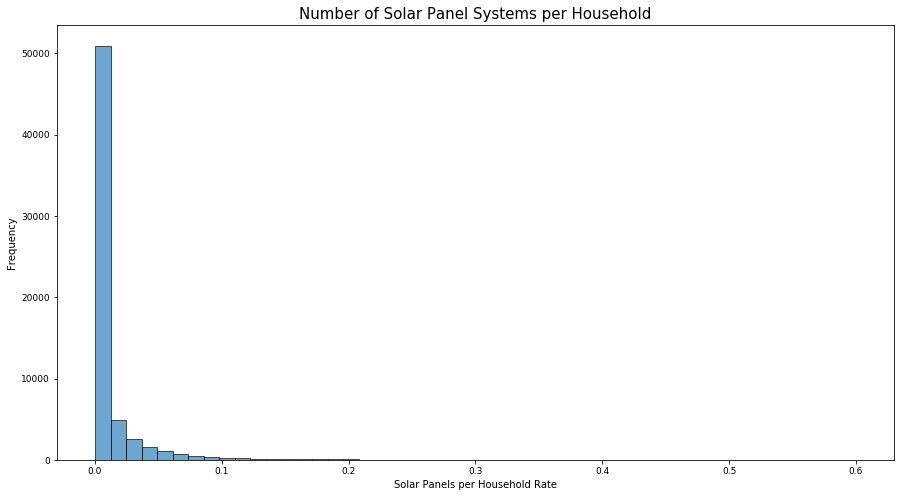

In [199]:
x_val = household_curve['population_density'].values
y_val = household_curve['number_of_solar_system_per_household']

#create bins for age groups on total and unique level
y_bins = np.linspace(0,.60,num=50)
x_bins = np.linspace(0,455000,num=100)

y_val.plot.hist(y_bins, linewidth=1.0, edgecolor='k', alpha=0.65, figsize=(15,8))
plt.title('Number of Solar Panel Systems per Household', fontsize = 15)
plt.xlabel("Solar Panels per Household Rate", fontsize = 10)

plt.tick_params(labelsize=9)
plt.savefig(file_path + '/Images/Number of Solar Panel Systems per HouseholdHIST.png')
plt.show()

In [200]:
file_name = 'Fips_Density_Map_appx.csv'
file_path = 'C:/Users/vasqu/Project_One_Bootcamp/Resources/'
input_file = os.path.join(file_path, file_name)

density_map_appx_df = pd.read_csv(input_file)
density_map_appx_df.head(10)

,FIPs,Urban_Density_simMajority_appx,Precision_simMajority_appx,State
0,1001,EXURBAN,Directly Mapped to Zip,AL
1,1003,EXURBAN,Directly Mapped to Zip,AL
2,1005,EXURBAN,Directly Mapped to Zip,AL
3,1007,EXURBAN,Directly Mapped to Zip,AL
4,1009,EXURBAN,Directly Mapped to Zip,AL
5,1011,EXURBAN,Directly Mapped to Zip,AL
6,1013,EXURBAN,Directly Mapped to Zip,AL
7,1015,EXURBAN,Directly Mapped to Zip,AL
8,1017,EXURBAN,Directly Mapped to Zip,AL
9,1019,EXURBAN,Directly Mapped to Zip,AL


In [201]:
fips_full = pd.Series(solar_df['fips'].astype('str'))
fips_general = [x[:5]  if len(x)==11 else x[:4] for x in fips_full]
fips_general = pd.Series(fips_general, dtype='str')

density_map_set = set(density_map_appx_df['FIPs'].astype('str'))
fips_general_set = set(fips_general)
fips_intersect = fips_general_set.intersection(density_map_set)
fips_generalized = pd.concat([fips_general, solar_df],axis=1, ignore_index=False)
fips_generalized = fips_generalized.rename({'Unnamed: 0': 'index', 0:'FIPS_General'}, axis='columns')
fips_generalized.drop({'index'}, axis='columns', inplace=True)
fips_generalized

,FIPS_General,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,27145,0,0,0.000000,27145011200,70352.78987,Stearns County,569,1690,13,...,39,11,13,34,0,0,25,12,0,9.46
1,27145,3,3,64.505776,27145011302,71496.88658,Stearns County,854,1459,31,...,39,11,13,34,0,0,25,12,0,9.46
2,27145,0,0,0.000000,27145011304,86840.15275,Stearns County,640,1116,68,...,39,11,13,34,0,0,25,12,0,9.46
3,27145,5,5,164.583303,27145011400,89135.31560,Stearns County,654,1314,15,...,39,11,13,34,0,0,25,12,0,9.46
4,27145,0,0,0.000000,27145011500,62225.90361,Stearns County,522,1395,24,...,39,11,13,34,0,0,25,12,0,9.46
5,27145,2,2,25.299013,27145011600,41068.93617,Stearns County,49,278,32,...,39,11,13,34,0,0,25,12,0,9.46
6,27145,0,0,0.000000,27145010500,74073.83367,Stearns County,242,867,10,...,39,11,13,34,0,0,25,12,0,9.46
7,27145,0,0,0.000000,27145011100,69412.19243,Stearns County,527,1665,6,...,39,11,13,34,0,0,25,12,0,9.46
8,27145,11,10,415.365350,27145010102,82502.40707,Stearns County,1582,1949,6,...,39,11,13,34,0,0,25,12,0,9.46
9,27145,16,15,532.693616,27145000500,54605.47413,Stearns County,658,1683,112,...,39,11,13,34,0,0,25,12,0,9.46


In [202]:
density_keys = list(density_map_set)
density_values = density_map_appx_df[['FIPs','Urban_Density_simMajority_appx']] 
density_dict = dict(zip(density_values['FIPs'].values, density_values['Urban_Density_simMajority_appx'].values))
urban_density = pd.Series(fips_generalized.FIPS_General.astype('int64').map(density_dict))
fips_generalized['urban_density'] = urban_density
col = list(fips_generalized.columns)
col.insert(1,col.pop(167))
col.insert(2,col.pop(5))
col.insert(3,col.pop(7))
col.insert(4,col.pop(39))
col.insert(5,col.pop(col.index('number_of_solar_system_per_household')))
col = np.array(col) 
urban_density_df = fips_generalized[col]
n_solar_household = urban_density_df['number_of_solar_system_per_household'] 
target_binary = np.array([1 if x>=0.05 else 0 for x in n_solar_household])
urban_density_df.insert(0,'n_ss_panel_household_target', target_binary)
urban_density_cat = pd.Categorical(urban_density_df['urban_density'].values,
               categories={'EXURBAN':0, 'SUBURBANEARLY':1, 'SUBURBANLATE':2, 'URBAN':3})
urban_density_df.insert(3, 'urban_density_cat', urban_density_cat.codes)
urban_density_df

,n_ss_panel_household_target,FIPS_General,urban_density,urban_density_cat,fips,county,state,number_of_solar_system_per_household,tile_count,solar_system_count,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,27145,EXURBAN,0,27145011200,Stearns County,mn,0.000000,0,0,...,39,11,13,34,0,0,25,12,0,9.46
1,0,27145,EXURBAN,0,27145011302,Stearns County,mn,0.001112,3,3,...,39,11,13,34,0,0,25,12,0,9.46
2,0,27145,EXURBAN,0,27145011304,Stearns County,mn,0.000000,0,0,...,39,11,13,34,0,0,25,12,0,9.46
3,0,27145,EXURBAN,0,27145011400,Stearns County,mn,0.002087,5,5,...,39,11,13,34,0,0,25,12,0,9.46
4,0,27145,EXURBAN,0,27145011500,Stearns County,mn,0.000000,0,0,...,39,11,13,34,0,0,25,12,0,9.46
5,0,27145,EXURBAN,0,27145011600,Stearns County,mn,0.004255,2,2,...,39,11,13,34,0,0,25,12,0,9.46
6,0,27145,EXURBAN,0,27145010500,Stearns County,mn,0.000000,0,0,...,39,11,13,34,0,0,25,12,0,9.46
7,0,27145,EXURBAN,0,27145011100,Stearns County,mn,0.000000,0,0,...,39,11,13,34,0,0,25,12,0,9.46
8,0,27145,EXURBAN,0,27145010102,Stearns County,mn,0.002742,11,10,...,39,11,13,34,0,0,25,12,0,9.46
9,0,27145,EXURBAN,0,27145000500,Stearns County,mn,0.003889,16,15,...,39,11,13,34,0,0,25,12,0,9.46


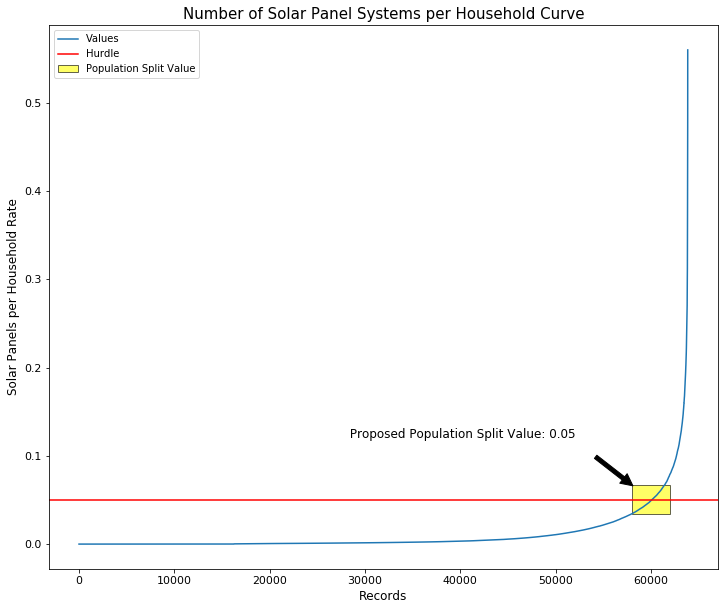

In [203]:
# Plot line curve of solar panels per household to gauge value range
household_curve = pd.DataFrame(panel_household_df[['state','number_of_solar_system_per_household', 'population_density']]).sort_values('number_of_solar_system_per_household')

x_val = household_curve['state'].values
y_val = household_curve['number_of_solar_system_per_household'].values
x_axis = np.arange(len(x_val))

fig, ax = plt.subplots()
ax.plot(x_axis,y_val, label='values')
ax.figure.set_figwidth(12)
ax.figure.set_figheight(10)
ax.set_xlabel("Records",fontsize=12)
ax.set_ylabel("Solar Panels per Household Rate",fontsize=12)
fig.tight_layout = True
plt.axhline(y=0.05, c='r', label='Hurdle')
plt.axvspan(58000,62000, facecolor='yellow', edgecolor='k', 
            alpha=0.6,ymin=0.1, ymax=0.155,linewidth=1.0, label='Population Split')
ax.annotate(' Proposed Population Split Value: 0.05', xy=(60000, 0.05), xytext=(28000, 0.12),
            arrowprops=dict(facecolor='black', shrink=0.24),fontsize=12)

plt.grid(False)
plt.title('Number of Solar Panel Systems per Household Curve', fontsize = 15)
plt.tick_params(labelsize=11)

plt.legend(['Values', 'Hurdle', 'Population Split Value'], loc='best')
plt.savefig(file_path + '/Images/Number of Solar Panel Systems per Household CurveLN.png')
plt.show()


In [204]:
cols = solar_df.columns
below_hdle = solar_df.loc[(solar_df['number_of_solar_system_per_household'] < 0.05)]
above_eq_hdle = solar_df.loc[(solar_df['number_of_solar_system_per_household'] >= 0.05)]
print(above_eq_hdle['number_of_solar_system_per_household'].describe(), end=' Above or Equal to Hurdle' )
print('\n')
print(below_hdle['number_of_solar_system_per_household'].describe(), end=' Below Hurdle')

count    3774.000000
mean        0.096633
std         0.055480
min         0.050000
25%         0.060895
50%         0.078621
75%         0.110816
max         0.559701
Name: number_of_solar_system_per_household, dtype: float64 Above or Equal to Hurdle

count    60073.000000
mean         0.005672
std          0.009749
min          0.000000
25%          0.000000
50%          0.001473
75%          0.005658
max          0.049977
Name: number_of_solar_system_per_household, dtype: float64 Below Hurdle

In [205]:
below_hdle = urban_density_df.loc[(urban_density_df['number_of_solar_system_per_household'] < 0.05)]
above_eq_hdle = urban_density_df.loc[(urban_density_df['number_of_solar_system_per_household'] >= 0.05)]
print(above_eq_hdle['number_of_solar_system_per_household'].describe(), end=' Above or Equal to Hurdle' )
print('\n')
print(below_hdle['number_of_solar_system_per_household'].describe(), end=' Below Hurdle')

count    3774.000000
mean        0.096633
std         0.055480
min         0.050000
25%         0.060895
50%         0.078621
75%         0.110816
max         0.559701
Name: number_of_solar_system_per_household, dtype: float64 Above or Equal to Hurdle

count    60073.000000
mean         0.005672
std          0.009749
min          0.000000
25%          0.000000
50%          0.001473
75%          0.005658
max          0.049977
Name: number_of_solar_system_per_household, dtype: float64 Below Hurdle

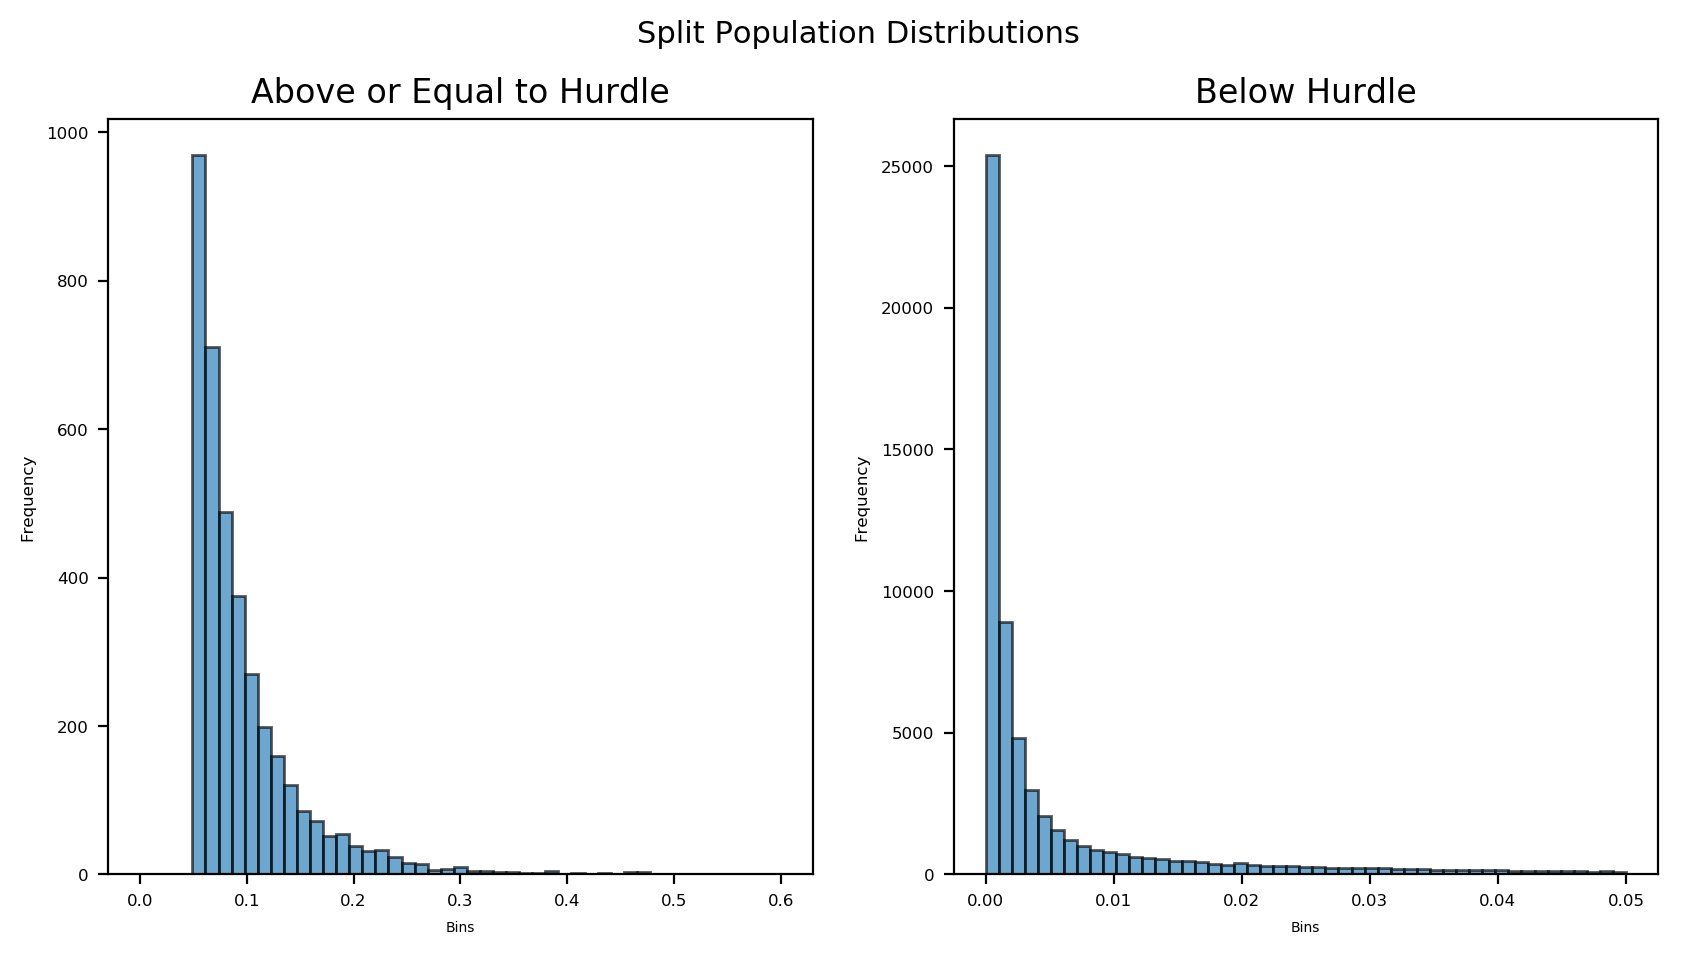

In [206]:
above_eq_hist = above_eq_hdle['number_of_solar_system_per_household'].values
below_hist = below_hdle['number_of_solar_system_per_household'].values
above_bins = np.linspace(0,.60,num=50)
below_bins = np.linspace(0,.05,num=50)


fig, axs = plt.subplots(1,2, figsize=(25, 25), dpi=200 )
axs[0].hist(above_eq_hist, above_bins, linewidth=1.0, edgecolor='k', alpha=0.65)
axs[0].set_title('Above or Equal to Hurdle', fontsize=12)
axs[0].set_xlabel('Bins', fontsize=5)
axs[0].set_ylabel('Frequency', fontsize=6)
axs[0].xaxis.set_tick_params(labelsize=6)
axs[0].yaxis.set_tick_params(labelsize=6)

fig.suptitle('Split Population Distributions', fontsize=11)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[1].hist(below_hist, below_bins, linewidth=1.0, edgecolor='k', alpha=0.65)
axs[1].set_title('Below Hurdle', fontsize=12)
axs[1].set_xlabel('Bins', fontsize=5)
axs[1].set_ylabel('Frequency', fontsize=6)
axs[1].yaxis.set_tick_params(labelsize=6)
axs[1].xaxis.set_tick_params(labelsize=6)
plt.savefig(file_path + '/Images/Split Population DistributionsHIST.png')
plt.show()


In [207]:
tree_frm = pd.DataFrame(urban_density_df)

tree_below_hdle = pd.DataFrame(tree_frm.loc[(urban_density_df['number_of_solar_system_per_household'] < 0.05)])
tree_above_eq_hdle = pd.DataFrame(tree_frm.loc[(urban_density_df['number_of_solar_system_per_household'] >= 0.05)])

above_eq_hdle_median  = tree_above_eq_hdle.number_of_solar_system_per_household.median()
below_hdle_median = tree_below_hdle.number_of_solar_system_per_household.median()


n_solar_household_b = tree_below_hdle['number_of_solar_system_per_household']
n_solar_household_a = tree_above_eq_hdle['number_of_solar_system_per_household']



tree_below_hdle.drop(columns=targets_df.columns, inplace=True)
tree_below_hdle.drop(columns=['state', 'urban_density', 'FIPS_General','number_of_solar_system_per_household', 'voting_2016_dem_win', 'voting_2012_dem_win','electricity_price_transportation'], inplace=True)


tree_above_eq_hdle.drop(columns=targets_df.columns, inplace=True)
tree_above_eq_hdle.drop(columns=['state', 'FIPS_General', 'urban_density','number_of_solar_system_per_household', 'voting_2016_dem_win', 'voting_2012_dem_win','electricity_price_transportation'], inplace=True)


below_hdle_target = np.array([1 if x>=below_hdle_median else 0 for x in n_solar_household_b])
above_eq_hdle_target = np.array([1 if x>=above_eq_hdle_median else 0 for x in n_solar_household_a])

tree_below_hdle.insert(0,'n_ss_panel_household_median', below_hdle_target)
tree_above_eq_hdle.insert(0,'n_ss_panel_household_median', above_eq_hdle_target)



x_below = dict(tree_below_hdle.iloc[:, 2:150])
y_below = {'n_ss_panel_household_median':[v for v in below_hdle_target]}


x_above = dict(tree_above_eq_hdle.iloc[:, 2:150])
y_above = {'n_ss_panel_household_median':[v for v in above_eq_hdle_target]}


x_below = tree_below_hdle.iloc[:, 2:150]
y_below = tree_below_hdle.iloc[:,0]


x_above = tree_above_eq_hdle.iloc[:, 2:150]
y_above = tree_above_eq_hdle.iloc[:,0]



In [208]:


x_train, x_test, y_train, y_test = train_test_split( x_below, y_below, test_size = 0.3, random_state = 100)
solar_power_uptake_classifier_gini_b = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=3, )
solar_power_uptake_classifier_gini_b.fit(x_train, y_train)

print(">>>>> Trained classifier <<<<<")
print(solar_power_uptake_classifier_gini_b)


>>>>> Trained classifier <<<<<
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


In [209]:
solar_power_uptake_classifier_entropy_b = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=3)
solar_power_uptake_classifier_entropy_b.fit(x_train, y_train)

print(">>>>> Trained classifier <<<<<")
print(solar_power_uptake_classifier_entropy_b)

>>>>> Trained classifier <<<<<
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


In [210]:
trial_1 = pd.DataFrame(x_test.iloc[1,:]).T
trial_2 = pd.DataFrame(x_test.iloc[2,:]).T
trial_3 = pd.DataFrame(x_test.iloc[3,:]).T
trial_4 = pd.DataFrame(x_test.iloc[4,:]).T


gini_test_b = solar_power_uptake_classifier_gini_b.predict(trial_1)
print("Predicted Solar Power Uptake-Trial 1, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_b))

gini_test_b = solar_power_uptake_classifier_gini_b.predict(trial_2)
print("Predicted Solar Power Uptake-Trial 2, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_b))

gini_test_b = solar_power_uptake_classifier_gini_b.predict(trial_3)
print("Predicted Solar Power Uptake-Trial 3, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_b))

gini_test_b = solar_power_uptake_classifier_gini_b.predict(trial_4)
print("Predicted Solar Power Uptake-Trial 4, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_b))

gini_test_b = solar_power_uptake_classifier_gini_b.predict(x_test)
print("Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_b))


Predicted Solar Power Uptake-Trial 1, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-Trial 2, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-Trial 3, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-Trial 4, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: [1 0 0 ... 0 1 0]


In [211]:
print("Accuracy is ", accuracy_score(y_test,gini_test_b*100))

Accuracy is  0.45916102541338366


In [212]:
trial_01 = pd.DataFrame(x_test.iloc[1,:]).T
trial_02 = pd.DataFrame(x_test.iloc[2,:]).T
trial_03 = pd.DataFrame(x_test.iloc[3,:]).T
trial_04 = pd.DataFrame(x_test.iloc[4,:]).T


entropy_test_b = solar_power_uptake_classifier_entropy_b.predict(trial_01)
print("Predicted Solar Power Uptake-Trial 01, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_b))

entropy_test_b = solar_power_uptake_classifier_entropy_b.predict(trial_02)
print("Predicted Solar Power Uptake-Trial 02, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_b))

entropy_test_b = solar_power_uptake_classifier_entropy_b.predict(trial_03)
print("Predicted Solar Power Uptake-Trial 03, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_b))

entropy_test_b = solar_power_uptake_classifier_entropy_b.predict(trial_04)
print("Predicted Solar Power Uptake-Trial 04, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_b))

entropy_test_b = solar_power_uptake_classifier_entropy_b.predict(x_test)
print("Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_b))


Predicted Solar Power Uptake-Trial 01, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-Trial 02, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-Trial 03, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-Trial 04, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: [1 0 0 ... 0 1 0]


In [213]:
print("Accuracy is ", accuracy_score(y_test,entropy_test_b*100))

Accuracy is  0.4478970147597381


In [214]:
x_index = np.arange(len(x_test.T))
x_metrics_list = x_test.T.index.get_values()
x_metrics_df =pd.DataFrame(x_metrics_list,index=x_index, columns=['X Metrics'], )
x_class = {x:k for x in x_metrics_list.view() for k, v in themes_dict.items() if x in v}
x_cls = x_metrics_df['X Metrics'].map(x_class)
x_metrics_df['X Class'] = x_cls
var_class = x_metrics_df['X Class']
print(var_class)
print('\n')
print(x_metrics_list)
x_metrics_df

0       Living_Situation
1                Welfare
2              Education
3              Education
4              Education
5              Education
6              Education
7              Education
8              Education
9              Education
10               Welfare
11               Welfare
12     Alternative_Usage
13     Alternative_Usage
14     Alternative_Usage
15     Alternative_Usage
16     Alternative_Usage
17     Alternative_Usage
18     Alternative_Usage
19     Alternative_Usage
20            Geographic
21               Welfare
22          Demographics
23          Demographics
24               Welfare
25               Welfare
26          Demographics
27          Demographics
28          Demographics
29          Demographics
             ...        
118             Logistic
119             Logistic
120             Logistic
121             Logistic
122             Logistic
123             Logistic
124             Logistic
125             Logistic
126             Logistic


,X Metrics,X Class
0,urban_density_cat,Living_Situation
1,average_household_income,Welfare
2,education_bachelor,Education
3,education_college,Education
4,education_doctoral,Education
5,education_high_school_graduate,Education
6,education_less_than_high_school,Education
7,education_master,Education
8,education_population,Education
9,education_professional_school,Education


In [215]:
with open("Solar_Uptake_classifier_gini.txt", "w") as f:
    f = tree.export_graphviz(solar_power_uptake_classifier_gini_b , out_file=f,
                             feature_names=x_metrics_list, class_names=var_class, node_ids=True)

with open("Solar_Uptake_classifier_entropy.txt", "w") as f:
    f = tree.export_graphviz(solar_power_uptake_classifier_entropy_b , out_file=f,
                             feature_names=x_metrics_list, class_names=var_class, node_ids=True,)


In [216]:
gini_dot_data = tree.export_graphviz(solar_power_uptake_classifier_gini_b, out_file=None, 
                    feature_names=x_metrics_list, class_names=var_class, node_ids=True, 
                    filled=True, rounded=True)  
graph = graphviz.Source(gini_dot_data)  
graph
graph.view(filename='gini_result_b', directory=file_path)


'C:/Users/vasqu/Project_One_Bootcamp/Resources/gini_result_b.pdf'

In [217]:
entropy_dot_data = tree.export_graphviz(solar_power_uptake_classifier_entropy_b , 
                    out_file=None, feature_names=x_metrics_list, class_names=True, node_ids=True, filled=True, rounded=True) 
graph = graphviz.Source(entropy_dot_data)
graph
graph.view(filename='entropy_result_b', directory=file_path)

'C:/Users/vasqu/Project_One_Bootcamp/Resources/entropy_result_b.pdf'

In [218]:


x_train, x_test, y_train, y_test = train_test_split( x_above, y_above, test_size = 0.3, random_state = 100)
solar_power_uptake_classifier_gini_a = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=3, )
solar_power_uptake_classifier_gini_a.fit(x_train, y_train)

print(">>>>> Trained classifier <<<<<")
print(solar_power_uptake_classifier_gini_a)


>>>>> Trained classifier <<<<<
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


In [219]:
solar_power_uptake_classifier_entropy_a = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=3)
solar_power_uptake_classifier_entropy_a.fit(x_train, y_train)

print(">>>>> Trained classifier <<<<<")
print(solar_power_uptake_classifier_entropy_a)

>>>>> Trained classifier <<<<<
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


In [220]:
trial_1 = pd.DataFrame(x_test.iloc[1,:]).T
trial_2 = pd.DataFrame(x_test.iloc[2,:]).T
trial_3 = pd.DataFrame(x_test.iloc[3,:]).T
trial_4 = pd.DataFrame(x_test.iloc[4,:]).T


gini_test_a = solar_power_uptake_classifier_gini_a.predict(trial_1)
print("Predicted Solar Power Uptake-Trial 1, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_a))

gini_test_a = solar_power_uptake_classifier_gini_a.predict(trial_2)
print("Predicted Solar Power Uptake-Trial 2, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_a))

gini_test_a = solar_power_uptake_classifier_gini_a.predict(trial_3)
print("Predicted Solar Power Uptake-Trial 3, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_a))

gini_test_a = solar_power_uptake_classifier_gini_a.predict(trial_4)
print("Predicted Solar Power Uptake-Trial 4, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_a))

gini_test_a = solar_power_uptake_classifier_gini_a.predict(x_test)
print("Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=gini_test_a))


Predicted Solar Power Uptake-Trial 1, Solar Uptake Classifier Predicted: [0]
Predicted Solar Power Uptake-Trial 2, Solar Uptake Classifier Predicted: [1]
Predicted Solar Power Uptake-Trial 3, Solar Uptake Classifier Predicted: [1]
Predicted Solar Power Uptake-Trial 4, Solar Uptake Classifier Predicted: [1]
Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: [1 0 1 ... 1 0 0]


In [221]:
print("Accuracy is ", accuracy_score(y_test,gini_test_a*100))

Accuracy is  0.2594880847308032


In [222]:
trial_01 = pd.DataFrame(x_test.iloc[1,:]).T
trial_02 = pd.DataFrame(x_test.iloc[2,:]).T
trial_03 = pd.DataFrame(x_test.iloc[3,:]).T
trial_04 = pd.DataFrame(x_test.iloc[4,:]).T


entropy_test_a = solar_power_uptake_classifier_entropy_a.predict(trial_01)
print("Predicted Solar Power Uptake-Trial 01, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_a))

entropy_test_a = solar_power_uptake_classifier_entropy_a.predict(trial_02)
print("Predicted Solar Power Uptake-Trial 02, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_a))

entropy_test_a = solar_power_uptake_classifier_entropy_a.predict(trial_03)
print("Predicted Solar Power Uptake-Trial 03, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_a))

entropy_test_a = solar_power_uptake_classifier_entropy_a.predict(trial_04)
print("Predicted Solar Power Uptake-Trial 04, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_a))

entropy_test_a = solar_power_uptake_classifier_entropy_a.predict(x_test)
print("Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: {predicted_uptake}".format
      (predicted_uptake=entropy_test_a))


Predicted Solar Power Uptake-Trial 01, Solar Uptake Classifier Predicted: [1]
Predicted Solar Power Uptake-Trial 02, Solar Uptake Classifier Predicted: [1]
Predicted Solar Power Uptake-Trial 03, Solar Uptake Classifier Predicted: [1]
Predicted Solar Power Uptake-Trial 04, Solar Uptake Classifier Predicted: [1]
Predicted Solar Power Uptake-x_test, Solar Uptake Classifier Predicted: [1 1 1 ... 1 0 0]


In [223]:
print("Accuracy is ", accuracy_score(y_test,entropy_test_a*100))

Accuracy is  0.21977052074139453


In [224]:
with open("Solar_Uptake_classifier_gini.txt", "w") as f:
    f = tree.export_graphviz(solar_power_uptake_classifier_gini_a , out_file=f,
                             feature_names=x_metrics_list, class_names=var_class, node_ids=True)

with open("Solar_Uptake_classifier_entropy.txt", "w") as f:
    f = tree.export_graphviz(solar_power_uptake_classifier_entropy_a , out_file=f,
                             feature_names=x_metrics_list, class_names=var_class, node_ids=True,)


In [225]:
gini_dot_data = tree.export_graphviz(solar_power_uptake_classifier_gini_a, out_file=None, 
                    feature_names=x_metrics_list, class_names=var_class, node_ids=True, 
                    filled=True, rounded=True)  
graph = graphviz.Source(gini_dot_data) 
graph
graph.view(filename='gini_result_a', directory=file_path)


'C:/Users/vasqu/Project_One_Bootcamp/Resources/gini_result_a.pdf'

In [226]:
entropy_dot_data = tree.export_graphviz(solar_power_uptake_classifier_entropy_a , 
                    out_file=None, feature_names=x_metrics_list,class_names=var_class, node_ids=True, filled=True, rounded=True) 
graph = graphviz.Source(entropy_dot_data)
graph
graph.view(filename='entropy_result_a', directory=file_path)


'C:/Users/vasqu/Project_One_Bootcamp/Resources/entropy_result_a.pdf'